In [1]:
import matplotlib.pyplot as plt

In [2]:
import matplotlib.image as mpimg

In [3]:
import numpy as np

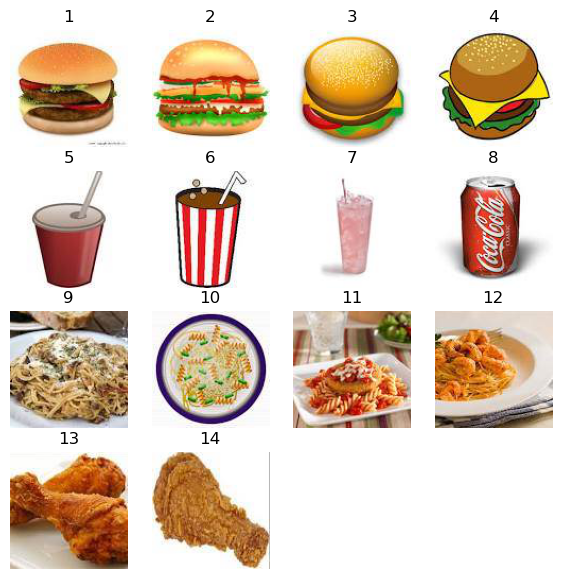

In [9]:
numImages = 16
fig = plt.figure(figsize = (7, 7))
imgData = np.zeros(shape = (numImages, 36963))

for i in range(1, numImages-1):
    filename = "pics/Picture"+str(i)+'.jpg'
    img = mpimg.imread(filename)
    ax = fig.add_subplot(4,4, i)
    plt.imshow(img)
    plt.axis('off')
    ax.set_title(str(i))
    imgData[i-1]= np.array(img.flatten()).reshape(1,img.shape[0]*img.shape[1]*img.shape[2])

In [10]:
import pandas as pd

In [11]:
from sklearn.decomposition import PCA

In [12]:
numComponents=2
pca=PCA(n_components=numComponents)
pca.fit(imgData)

PCA(n_components=2)

In [13]:
projected =pca.transform(imgData)

In [14]:
projected

array([[ -5884.57215064,  -5610.42471392],
       [ -5775.41372857,  -6523.03284275],
       [ -4580.44849163,  -7237.67575567],
       [ -2368.42187047,  -8127.82754759],
       [-10002.85490176,   3329.78631277],
       [-10283.31513087,   8316.22358962],
       [-15270.69796615,   6148.13971678],
       [ -8827.18818327,   1644.37612582],
       [  3478.50712036,   3507.50119685],
       [ -4685.58962417,    733.68441893],
       [  2771.89475771,   4076.69869008],
       [  -609.68204875,   3038.46142998],
       [  5341.25346252,  -4380.27394366],
       [ -4412.56537862,  -2178.91444674],
       [ 30554.54706716,   1631.63888475],
       [ 30554.54706716,   1631.63888475]])

In [15]:
projected=pd.DataFrame(projected, columns=['pc1','pc2'], index=range(1, numImages+1))

In [16]:
projected['food']=['burger','burger','burger','burger','drink','drink','drink','drink','pasta','pasta','pasta','pasta','chicken','chicken','chicken','chicken']

In [17]:
projected

pc1          pc2     food
1   -5884.572151 -5610.424714   burger
2   -5775.413729 -6523.032843   burger
3   -4580.448492 -7237.675756   burger
4   -2368.421870 -8127.827548   burger
5  -10002.854902  3329.786313    drink
6  -10283.315131  8316.223590    drink
7  -15270.697966  6148.139717    drink
8   -8827.188183  1644.376126    drink
9    3478.507120  3507.501197    pasta
10  -4685.589624   733.684419    pasta
11   2771.894758  4076.698690    pasta
12   -609.682049  3038.461430    pasta
13   5341.253463 -4380.273944  chicken
14  -4412.565379 -2178.914447  chicken
15  30554.547067  1631.638885  chicken
16  30554.547067  1631.638885  chicken

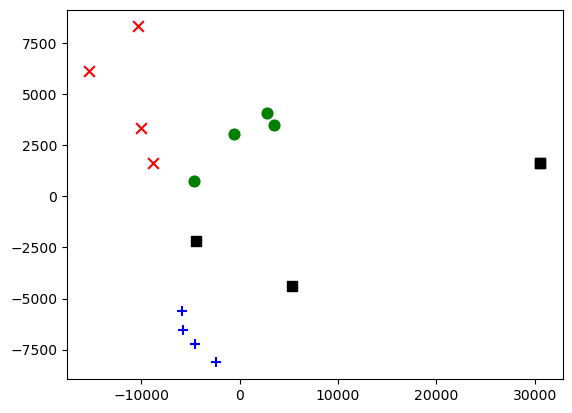

In [20]:
colors = {'burger': 'b', 'drink': 'r', 'pasta': 'g', 'chicken': 'k'}
markerTypes = {'burger': '+',
              'drink': 'x',
              'pasta': 'o',
              'chicken': 's'}
for foodType in markerTypes:
    d = projected[projected['food'] == foodType]
    plt.scatter(d['pc1'], d['pc2'], c = colors[foodType], s= 60, marker=markerTypes[foodType])